<a href="https://colab.research.google.com/github/tantiboro/whatweeatinamerica/blob/main/wweia_nutrient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the dataset
df = pd.read_excel('/content/drive/MyDrive/New Folder/dataset/2019-2020 FNDDS At A Glance - FNDDS Ingredients.xlsx', skiprows=1)

In [ ]:
df.head(2)

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,1.658,0.497,14,60,61,0,7,0,0,0,0.014,0.036,0.177,0.011,...,51,17,0,0,0.0,0.000,0.000,0.000,0.063,0.256,0.321,0.919,0.293,0.129,1.475,0.040,0.0,0.374,0.052,0.0,0.026,0.0,0.000,0.0,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,1.249,0.458,0.070,9,57,58,0,4,0,0,0,0.057,0.137,0.110,0.061,...,156,39,0,0,0.0,0.046,0.036,0.023,0.056,0.065,0.204,0.576,0.208,0.032,0.465,0.002,0.0,0.074,0.008,0.0,0.003,0.0,0.001,0.0,88.92


In [ ]:
dfa = df.copy()

In [ ]:
dfa.head()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,1.658,0.497,14,60,61,0,7,0,0,0,0.014,0.036,0.177,0.011,...,51,17,0,0,0.0,0.000,0.000,0.000,0.063,0.256,0.321,0.919,0.293,0.129,1.475,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,1.249,0.458,0.070,9,57,58,0,4,0,0,0,0.057,0.137,0.110,0.061,...,156,39,0,0,0.0,0.046,0.036,0.023,0.056,0.065,0.204,0.576,0.208,0.032,0.465,0.002,0.0,0.074,0.008,0.0,0.003,0.000,0.001,0.0,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,1.860,0.688,0.108,12,31,32,0,7,0,0,0,0.056,0.138,0.105,0.061,...,150,38,0,0,0.0,0.067,0.054,0.034,0.084,0.097,0.303,0.857,0.309,0.047,0.694,0.004,0.0,0.115,0.013,0.0,0.004,0.001,0.002,0.0,88.10
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,1.110,0.400,0.058,8,83,83,0,3,0,0,0,0.059,0.137,0.112,0.061,...,159,39,0,0,0.0,0.041,0.032,0.021,0.049,0.058,0.181,0.512,0.184,0.029,0.410,0.002,0.0,0.061,0.007,0.0,0.003,0.000,0.001,0.0,89.10
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,0.568,0.210,0.032,5,58,58,0,1,0,0,0,0.057,0.140,0.113,0.060,...,159,39,0,0,0.0,0.022,0.015,0.011,0.023,0.026,0.093,0.265,0.096,0.014,0.214,0.001,0.0,0.033,0.004,0.0,0.001,0.000,0.000,0.0,89.70


In [ ]:
#print(*dfa.columns)

In [ ]:
dfa = dfa.drop(dfa.iloc[:, -21:-1], axis=1)

In [ ]:
dfa.columns = dfa.columns.str.lower().str.replace('  ','_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')

<ipython-input-10-e0c9467a00b5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfa.columns = dfa.columns.str.lower().str.replace('  ','_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
<ipython-input-10-e0c9467a00b5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfa.columns = dfa.columns.str.lower().str.replace('  ','_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')


In [ ]:
#dfa.info()

In [ ]:
print(*dfa.columns)

food_code main_food_description wweia_category_number wweia_category_description energy_kcal protein_g carbohydrate_g sugars,_total
g fiber,_total_dietary_g total_fat_g fatty_acids,_total_saturated_g fatty_acids,_total_monounsaturated_g fatty_acids,_total_polyunsaturated_g cholesterol_mg retinol_mcg vitamin_a,_rae_mcg_rae carotene,_alpha_mcg carotene,_beta_mcg cryptoxanthin,_beta_mcg lycopene_mcg lutein_+_zeaxanthin_mcg thiamin_mg riboflavin_mg niacin_mg vitamin_b_6_mg folic_acid_mcg folate,_food_mcg folate,_dfe_mcg_dfe folate,_total_mcg choline,_total_mg vitamin_b_12_mcg vitamin_b_12,_added
mcg vitamin_c_mg vitamin_d_d2_+_d3_mcg vitamin_e_alpha_tocopherol_mg vitamin_e,_added
mg vitamin_k_phylloquinone_mcg calcium_mg phosphorus_mg magnesium_mg iron
mg zinc
mg copper_mg selenium_mcg potassium_mg sodium_mg caffeine_mg theobromine_mg water
g


In [ ]:
dfa.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_').str.replace(':', '_').str.replace('?', '').str.replace('&', '_')


<ipython-input-13-5852e2f1b596>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfa.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_').str.replace(':', '_').str.replace('?', '').str.replace('&', '_')
<ipython-input-13-5852e2f1b596>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfa.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_').str.replace(':', '_').str.replace('?', '').str.replace('&', '_')
<ipython-input-13-5852e2f1b596>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expre

Index(['food_code', 'main_food_description', 'wweia_category_number',
       'wweia_category_description', 'energy_kcal', 'protein_g',
       'carbohydrate_g', 'sugars,_total\ng', 'fiber,_total_dietary_g',
       'total_fat_g', 'fatty_acids,_total_saturated_g',
       'fatty_acids,_total_monounsaturated_g',
       'fatty_acids,_total_polyunsaturated_g', 'cholesterol_mg', 'retinol_mcg',
       'vitamin_a,_rae_mcg_rae', 'carotene,_alpha_mcg', 'carotene,_beta_mcg',
       'cryptoxanthin,_beta_mcg', 'lycopene_mcg', 'lutein_+_zeaxanthin_mcg',
       'thiamin_mg', 'riboflavin_mg', 'niacin_mg', 'vitamin_b_6_mg',
       'folic_acid_mcg', 'folate,_food_mcg', 'folate,_dfe_mcg_dfe',
       'folate,_total_mcg', 'choline,_total_mg', 'vitamin_b_12_mcg',
       'vitamin_b_12,_added\nmcg', 'vitamin_c_mg', 'vitamin_d_d2_+_d3_mcg',
       'vitamin_e_alpha_tocopherol_mg', 'vitamin_e,_added\nmg',
       'vitamin_k_phylloquinone_mcg', 'calcium_mg', 'phosphorus_mg',
       'magnesium_mg', 'iron\nmg', 'zinc\

In [ ]:
dfa.describe()


,food_code,wweia_category_number,energy_kcal,protein_g,carbohydrate_g,"sugars,_total\ng","fiber,_total_dietary_g",total_fat_g,"fatty_acids,_total_saturated_g","fatty_acids,_total_monounsaturated_g","fatty_acids,_total_polyunsaturated_g",cholesterol_mg,retinol_mcg,"vitamin_a,_rae_mcg_rae","carotene,_alpha_mcg","carotene,_beta_mcg","cryptoxanthin,_beta_mcg",lycopene_mcg,lutein_+_zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b_6_mg,folic_acid_mcg,"folate,_food_mcg","folate,_dfe_mcg_dfe","folate,_total_mcg","choline,_total_mg",vitamin_b_12_mcg,"vitamin_b_12,_added\nmcg",vitamin_c_mg,vitamin_d_d2_+_d3_mcg,vitamin_e_alpha_tocopherol_mg,"vitamin_e,_added\nmg",vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,iron\nmg,zinc\nmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,water\ng
count,5.624000e+03,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.00000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000
mean,5.064220e+07,4721.354018,197.013514,8.105884,20.547002,6.800884,1.726369,9.226767,2.833779,3.264583,2.251587,34.019915,39.738976,62.599040,44.510135,249.015825,5.647226,287.711415,221.075213,0.158080,0.169222,2.364721,0.170201,14.299431,20.685277,44.868243,34.885846,32.854748,0.476300,0.052838,5.464669,0.431757,1.149893,0.118140,15.91691,72.252845,126.780583,27.780228,1.536639,1.103193,0.129593,11.861949,210.743421,340.061344,3.204125,4.477596,60.295525
std,2.414017e+07,2145.882897,143.244099,7.766278,21.097697,12.081560,2.483058,11.661257,4.206053,4.862003,4.190374,80.440973,179.740394,196.018899,266.533369,928.101142,42.380462,1260.971565,1004.297191,0.414228,0.312173,3.453144,0.254945,54.531229,43.182734,108.627670,75.006568,45.768224,1.749874,0.407259,15.206659,1.409252,3.321154,1.551189,60.18175,117.282214,124.646981,40.393235,2.864044,2.214014,0.330992,28.398646,211.373898,340.592176,90.410798,38.474187,26.576561
min,1.100000e+07,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.741024e+07,3004.000000,87.000000,2.170000,5.450000,0.700000,0.200000,2.010000,0.458000,0.474000,0.315750,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.057000,0.452000,0.052000,0.000000,5.000000,8.000000,7.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.210000,0.000000,0.90000,14.000000,47.000000,12.000000,0.430000,0.320000,0.044000,1.400000,111.000000,130.000000,0.000000,0.000000,46.085000
50%,5.371080e+07,4002.000000,165.000000,6.030000,13.920000,2.330000,1.100000,5.800000,1.469000,1.911000,1.087000,7.000000,5.000000,17.000000,0.000000,9.000000,0.000000,0.000000,18.000000,0.083000,0.118500,1.412500,0.105000,0.000000,12.000000,22.000000,20.000000,18.600000,0.130000,0.000000,0.600000,0.000000,0.540000,0.000000,3.80000,34.000000,100.000000,20.000000,1.000000,0.670000,0.076000,7.400000,177.000000,310.000000,0.000000,0.000000,67.560000
75%,7.140501e+07,6418.000000,272.000000,11.512500,26.040000,6.990000,2.200000,12.940000,3.768250,4.428500,2.543000,40.250000,36.000000,59.000000,1.000000,79.000000,1.000000,0.000000,90.000000,0.195000,0.217000,3.307250,0.195250,16.000000,25.000000,58.000000,45.000000,39.200000,0.460000,0.000000,4.900000,0.300000,1.190000,0.00

<Axes: >

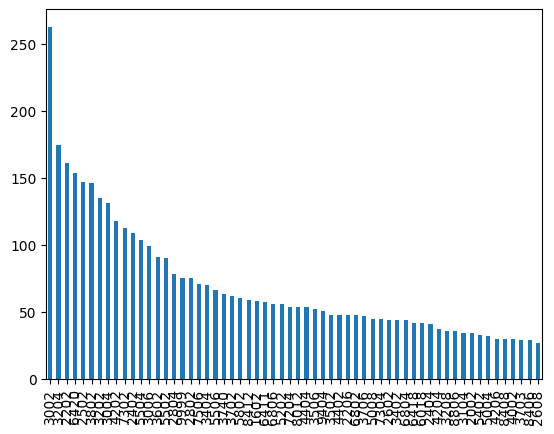

In [ ]:
dfa['wweia_category_number'].value_counts()[:60].plot(kind='bar')


In [ ]:
B = dfa['wweia_category_description'].value_counts()
b_df = pd.DataFrame(B)
#b_df.columns = ['wweia_category_number', 'count']
b_df = b_df.reset_index()
b_df.columns = ['wweia_category_description', 'count']
b_df.head()




,wweia_category_description,count
0,Meat mixed dishes,263
1,"Pasta mixed dishes, excludes macaroni and cheese",175
2,"Chicken, whole pieces",161
3,Other vegetables and combinations,154
4,Eggs and omelets,147


In [ ]:
import plotly.express as px

fig = px.bar(b_df[:30], y='count', x='wweia_category_description', text_auto='.2s',
            title="Default: various text sizes, positions and angles", height=1000)
fig.show()

In [ ]:
dfa_3002 = dfa.query('`wweia_category_number` == 3002')
dfa_3002 = dfa_3002.reset_index(drop=True)
dfa_3002.head()


,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,"sugars,_total\ng","fiber,_total_dietary_g",total_fat_g,"fatty_acids,_total_saturated_g","fatty_acids,_total_monounsaturated_g","fatty_acids,_total_polyunsaturated_g",cholesterol_mg,retinol_mcg,"vitamin_a,_rae_mcg_rae","carotene,_alpha_mcg","carotene,_beta_mcg","cryptoxanthin,_beta_mcg",lycopene_mcg,lutein_+_zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b_6_mg,folic_acid_mcg,"folate,_food_mcg","folate,_dfe_mcg_dfe","folate,_total_mcg","choline,_total_mg",vitamin_b_12_mcg,"vitamin_b_12,_added\nmcg",vitamin_c_mg,vitamin_d_d2_+_d3_mcg,vitamin_e_alpha_tocopherol_mg,"vitamin_e,_added\nmg",vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,iron\nmg,zinc\nmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,water\ng
0,22101330,"Pork, chop, stuffed",3002,Meat mixed dishes,190,18.37,7.82,0.00,1.0,9.04,2.668,3.855,1.685,46,27,28,0,21,0,0,0,0.448,0.163,5.778,0.411,32,3,57,35,57.4,0.41,0.0,0.3,0.4,0.43,0.0,3.1,15,174,22,0.73,1.34,0.073,40.6,293,414,0,0,62.96
1,27100100,"Barbecue meat, NFS",3002,Meat mixed dishes,226,18.14,12.23,9.97,0.3,11.17,4.020,4.934,1.394,65,2,6,0,40,1,1365,26,0.263,0.233,3.198,0.280,0,3,3,3,72.7,0.92,0.0,0.2,0.6,0.36,0.0,0.8,23,158,19,1.36,3.51,0.101,23.9,289,601,0,0,55.89
2,27111000,Beef with tomato-based sauce,3002,Meat mixed dishes,149,21.72,1.58,1.06,0.4,6.36,2.391,2.686,0.292,63,0,6,0,73,1,3940,7,0.056,0.132,4.014,0.308,0,9,9,9,84.0,1.19,0.0,2.0,0.1,0.73,0.0,1.9,9,142,18,2.05,3.69,0.086,22.3,264,363,0,0,68.76
3,27111100,Beef goulash,3002,Meat mixed dishes,104,13.70,2.93,1.07,0.4,3.79,0.922,1.534,0.810,35,0,5,0,58,4,1362,22,0.056,0.117,3.737,0.226,1,10,13,12,52.0,0.83,0.0,8.4,0.0,0.52,0.0,3.1,17,137,18,1.38,2.54,0.076,16.9,260,220,0,0,78.49
4,27111200,Beef burgundy,3002,Meat mixed dishes,148,18.48,4.20,1.45,0.7,6.00,1.776,2.449,0.968,52,0,1,0,16,0,193,11,0.065,0.212,4.454,0.239,1,16,18,17,70.6,1.27,0.0,2.0,0.1,0.57,0.0,6.3,20,184,23,1.85,4.52,0.143,22.8,369,369,0,0,69.90


In [ ]:
dfa_3002['wweia_category_description'].value_counts()

Meat mixed dishes    263
Name: wweia_category_description, dtype: int64

In [ ]:
dfa_3002 = dfa_3002.drop(columns=['wweia_category_description', 'wweia_category_number', 'food_code'])
dfa_3002.head()





,main_food_description,energy_kcal,protein_g,carbohydrate_g,"sugars,_total\ng","fiber,_total_dietary_g",total_fat_g,"fatty_acids,_total_saturated_g","fatty_acids,_total_monounsaturated_g","fatty_acids,_total_polyunsaturated_g",cholesterol_mg,retinol_mcg,"vitamin_a,_rae_mcg_rae","carotene,_alpha_mcg","carotene,_beta_mcg","cryptoxanthin,_beta_mcg",lycopene_mcg,lutein_+_zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b_6_mg,folic_acid_mcg,"folate,_food_mcg","folate,_dfe_mcg_dfe","folate,_total_mcg","choline,_total_mg",vitamin_b_12_mcg,"vitamin_b_12,_added\nmcg",vitamin_c_mg,vitamin_d_d2_+_d3_mcg,vitamin_e_alpha_tocopherol_mg,"vitamin_e,_added\nmg",vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,iron\nmg,zinc\nmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,water\ng
0,"Pork, chop, stuffed",190,18.37,7.82,0.00,1.0,9.04,2.668,3.855,1.685,46,27,28,0,21,0,0,0,0.448,0.163,5.778,0.411,32,3,57,35,57.4,0.41,0.0,0.3,0.4,0.43,0.0,3.1,15,174,22,0.73,1.34,0.073,40.6,293,414,0,0,62.96
1,"Barbecue meat, NFS",226,18.14,12.23,9.97,0.3,11.17,4.020,4.934,1.394,65,2,6,0,40,1,1365,26,0.263,0.233,3.198,0.280,0,3,3,3,72.7,0.92,0.0,0.2,0.6,0.36,0.0,0.8,23,158,19,1.36,3.51,0.101,23.9,289,601,0,0,55.89
2,Beef with tomato-based sauce,149,21.72,1.58,1.06,0.4,6.36,2.391,2.686,0.292,63,0,6,0,73,1,3940,7,0.056,0.132,4.014,0.308,0,9,9,9,84.0,1.19,0.0,2.0,0.1,0.73,0.0,1.9,9,142,18,2.05,3.69,0.086,22.3,264,363,0,0,68.76
3,Beef goulash,104,13.70,2.93,1.07,0.4,3.79,0.922,1.534,0.810,35,0,5,0,58,4,1362,22,0.056,0.117,3.737,0.226,1,10,13,12,52.0,0.83,0.0,8.4,0.0,0.52,0.0,3.1,17,137,18,1.38,2.54,0.076,16.9,260,220,0,0,78.49
4,Beef burgundy,148,18.48,4.20,1.45,0.7,6.00,1.776,2.449,0.968,52,0,1,0,16,0,193,11,0.065,0.212,4.454,0.239,1,16,18,17,70.6,1.27,0.0,2.0,0.1,0.57,0.0,6.3,20,184,23,1.85,4.52,0.143,22.8,369,369,0,0,69.90


<Axes: xlabel='energy_kcal', ylabel='Count'>

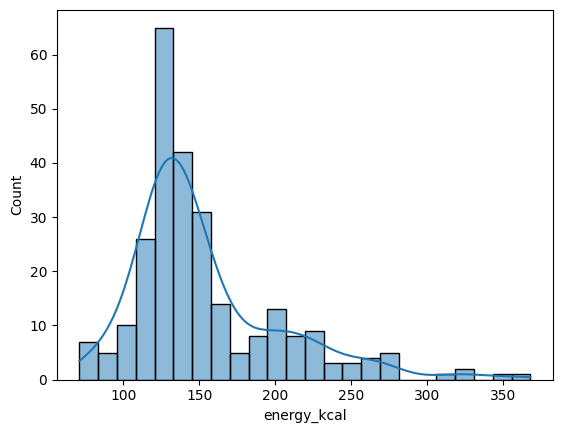

In [ ]:
sns.histplot(data=dfa_3002, x='energy_kcal', kde=True)

#sns.histplot(data=dfa_3002, x='protein_g', bins=10, kde=True)

<Axes: xlabel='protein_g', ylabel='Count'>

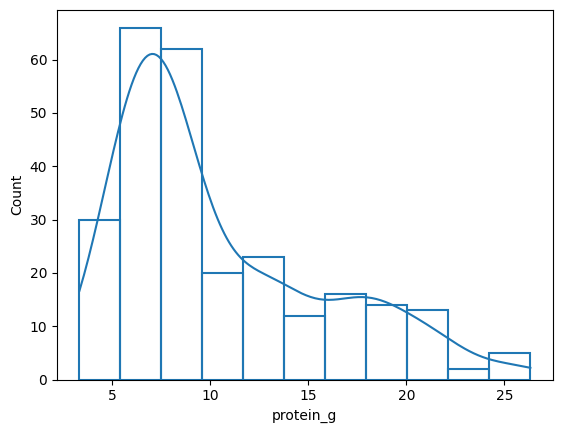

In [ ]:
sns.histplot(data=dfa_3002, x='protein_g', kde=True, fill=False)



In [ ]:
#dfa_3002['protein_g'].value_counts()#[:20].plot(kind='barh')




In [ ]:
dfa_3204 = dfa.query('`wweia_category_number` == 3204')
dfa_3204 = dfa_3204.reset_index(drop=True)
dfa_3204.head()


,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,"sugars,_total\ng","fiber,_total_dietary_g",total_fat_g,"fatty_acids,_total_saturated_g","fatty_acids,_total_monounsaturated_g","fatty_acids,_total_polyunsaturated_g",cholesterol_mg,retinol_mcg,"vitamin_a,_rae_mcg_rae","carotene,_alpha_mcg","carotene,_beta_mcg","cryptoxanthin,_beta_mcg",lycopene_mcg,lutein_+_zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b_6_mg,folic_acid_mcg,"folate,_food_mcg","folate,_dfe_mcg_dfe","folate,_total_mcg","choline,_total_mg",vitamin_b_12_mcg,"vitamin_b_12,_added\nmcg",vitamin_c_mg,vitamin_d_d2_+_d3_mcg,vitamin_e_alpha_tocopherol_mg,"vitamin_e,_added\nmg",vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,iron\nmg,zinc\nmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,water\ng
0,58122210,"Gnocchi, cheese",3204,"Pasta mixed dishes, excludes macaroni and cheese",178,8.51,9.38,0.14,0.2,11.96,4.344,4.468,2.167,68,128,132,0,49,2,0,64,0.081,0.171,0.548,0.026,8,12,26,20,41.0,0.31,0.0,0.0,0.7,0.84,0.0,7.0,169,144,12,0.86,1.00,0.030,13.3,83,263,0,0,68.83
1,58122220,"Gnocchi, potato",3204,"Pasta mixed dishes, excludes macaroni and cheese",135,2.44,17.20,0.99,1.0,6.33,3.420,1.269,0.259,18,60,62,0,27,4,0,15,0.129,0.074,1.210,0.102,12,5,26,17,9.1,0.06,0.0,1.9,0.2,0.03,0.0,1.3,22,41,12,0.83,0.24,0.074,2.3,139,279,0,0,72.94
2,58130011,Lasagna with meat,3204,"Pasta mixed dishes, excludes macaroni and cheese",139,7.45,16.17,3.33,1.6,4.97,2.322,1.798,0.402,16,20,42,8,249,2,3764,197,0.056,0.056,1.602,0.139,12,3,23,15,17.2,0.83,0.0,4.4,0.0,0.98,0.0,6.6,82,115,20,0.73,0.89,0.097,16.6,207,390,0,0,69.78
3,58130013,"Lasagna with meat, canned",3204,"Pasta mixed dishes, excludes macaroni and cheese",97,3.24,13.26,1.97,1.5,3.41,1.460,1.617,0.237,5,4,14,1,121,0,3335,65,0.057,0.057,1.245,0.055,10,11,28,21,12.5,0.15,0.0,0.0,0.0,0.50,0.0,0.8,12,40,12,1.09,0.39,0.053,9.6,178,283,0,0,79.12
4,58130014,"Lasagna with meat, from restaurant",3204,"Pasta mixed dishes, excludes macaroni and cheese",185,10.83,11.36,3.15,1.5,10.69,4.941,3.313,0.788,36,64,81,9,197,0,2517,97,0.140,0.237,1.843,0.122,17,8,38,26,33.5,0.66,0.0,0.7,0.0,0.91,0.0,6.8,197,178,22,0.79,1.32,0.070,18.0,255,466,0,0,64.87


In [ ]:
dfa_3204['main_food_description'].value_counts()


Gnocchi, cheese                                                                            1
Pasta, whole grain, with tomato-based sauce, poultry, and added vegetables, home recipe    1
Pasta, whole grain, with tomato-based sauce and meat, ready-to-heat                        1
Pasta, whole grain, with tomato-based sauce, meat, and added vegetables, restaurant        1
Pasta, whole grain, with tomato-based sauce, meat, and added vegetables, home recipe       1
                                                                                          ..
Pasta with tomato-based sauce, and added vegetables, ready-to-heat                         1
Pasta with sauce and meat, from school lunch                                               1
Pasta with tomato-based sauce and meat, restaurant                                         1
Pasta with tomato-based sauce and meat, home recipe                                        1
Spaghetti with meat sauce, diet frozen meal                           

In [ ]:
dfa['wweia_category_description'].value_counts()


Meat mixed dishes                                   263
Pasta mixed dishes, excludes macaroni and cheese    175
Chicken, whole pieces                               161
Other vegetables and combinations                   154
Eggs and omelets                                    147
                                                   ... 
Enhanced water                                        2
Bottled water                                         1
Baby water                                            1
Grapes                                                1
Human milk                                            1
Name: wweia_category_description, Length: 169, dtype: int64

In [ ]:
#dfa['wweia_category_number'].value_counts()



In [ ]:
dfa_coffee = dfa.query('wweia_category_description == "Coffee"')
#dfa_coffee = dfa_coffee.reset_index(drop=True)
dfa_coffee.head()



,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,"sugars,_total\ng","fiber,_total_dietary_g",total_fat_g,"fatty_acids,_total_saturated_g","fatty_acids,_total_monounsaturated_g","fatty_acids,_total_polyunsaturated_g",cholesterol_mg,retinol_mcg,"vitamin_a,_rae_mcg_rae","carotene,_alpha_mcg","carotene,_beta_mcg","cryptoxanthin,_beta_mcg",lycopene_mcg,lutein_+_zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b_6_mg,folic_acid_mcg,"folate,_food_mcg","folate,_dfe_mcg_dfe","folate,_total_mcg","choline,_total_mg",vitamin_b_12_mcg,"vitamin_b_12,_added\nmcg",vitamin_c_mg,vitamin_d_d2_+_d3_mcg,vitamin_e_alpha_tocopherol_mg,"vitamin_e,_added\nmg",vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,iron\nmg,zinc\nmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,water\ng
5173,92100000,"Coffee, NS as to type",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,99.39
5174,92100500,"Coffee, NS as to brewed or instant",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,99.39
5175,92101000,"Coffee, brewed",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,99.39
5176,92101500,"Coffee, brewed, blend of regular and decaffein...",7302,Coffee,0,0.11,0.00,0.00,0.0,0.01,0.002,0.008,0.002,0,0,0,0,0,0,0,0,0.007,0.038,0.206,0.000,0,1,1,1,1.8,0.0,0.0,0.0,0.0,0.00,0.0,0.1,2,2,4,0.03,0.02,0.005,0.0,52,2,20,0,99.34
5177,92101600,"Coffee, Turkish",7302,Coffee,27,0.11,6.47,6.48,0.0,0.04,0.002,0.014,0.001,0,0,0,0,0,0,0,0,0.013,0.072,0.179,0.001,0,2,2,2,2.4,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,46,2,37,0,92.94


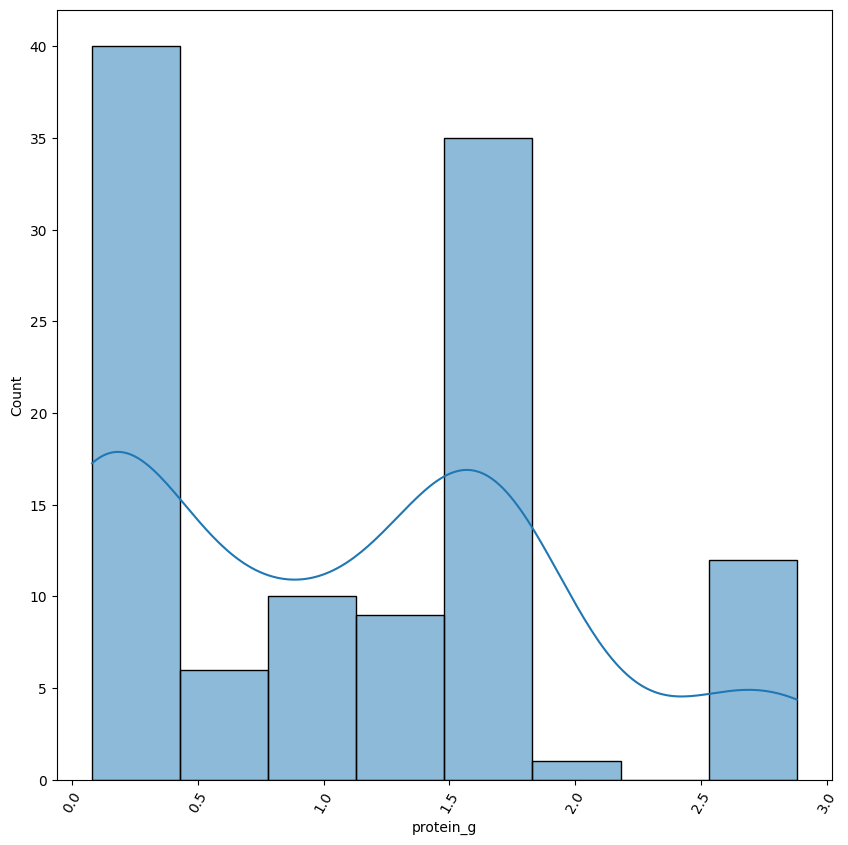

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.histplot(data=dfa_coffee, x='protein_g',kde=True)
sns.color_palette("flare")
plt.setp(ax.get_xticklabels(), rotation=60)
plt.show()



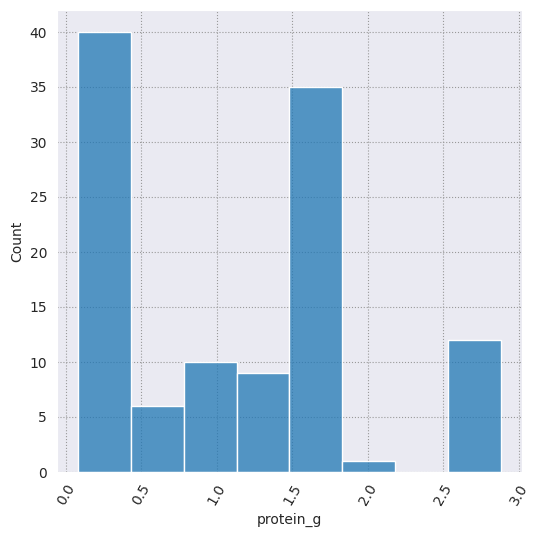

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.histplot(data=dfa_coffee, x='protein_g')
sns.color_palette("flare")
plt.setp(ax.get_xticklabels(), rotation=60)
plt.show()


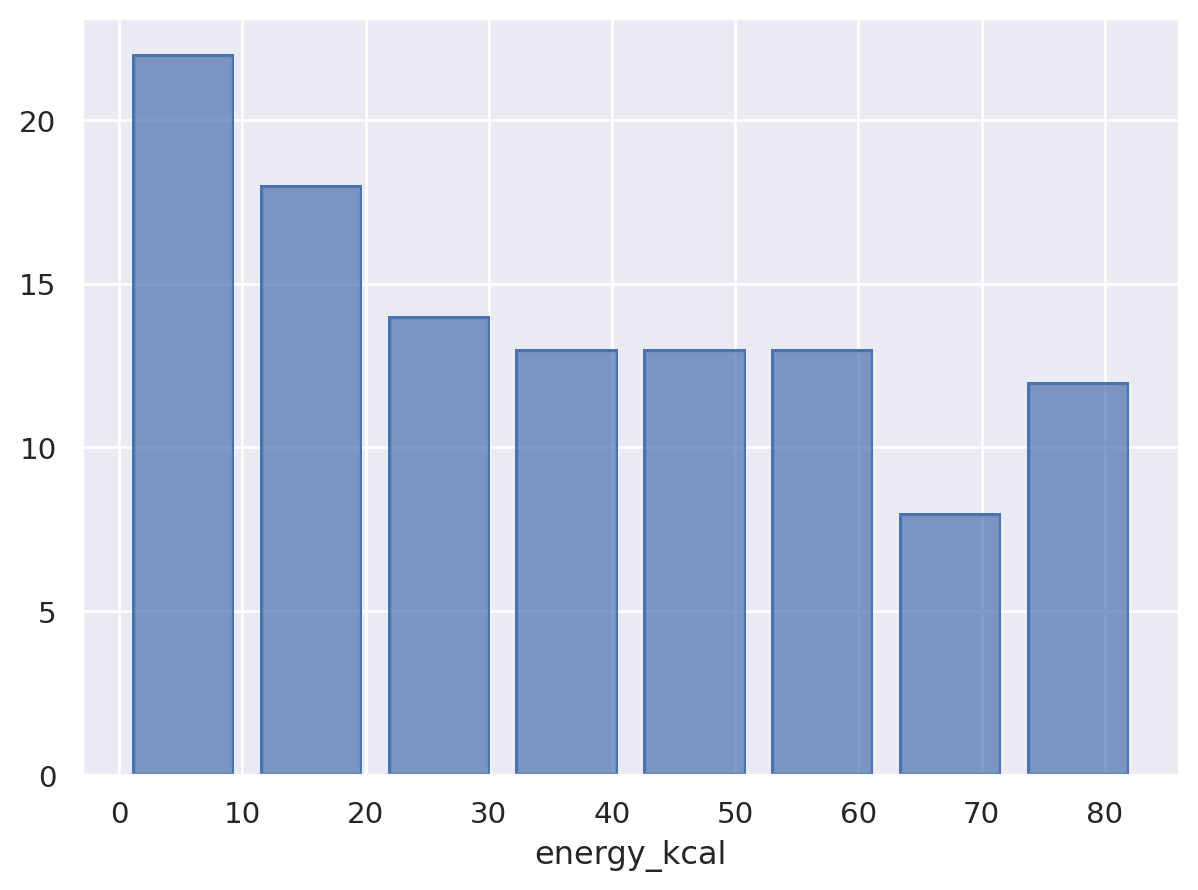

In [ ]:
#sns.histplot(data=dfa_coffee, x='energy_kcal', bins=5, kde=True)
import seaborn.objects as so
so.Plot(dfa_coffee, "energy_kcal").add(so.Bar(), so.Hist())





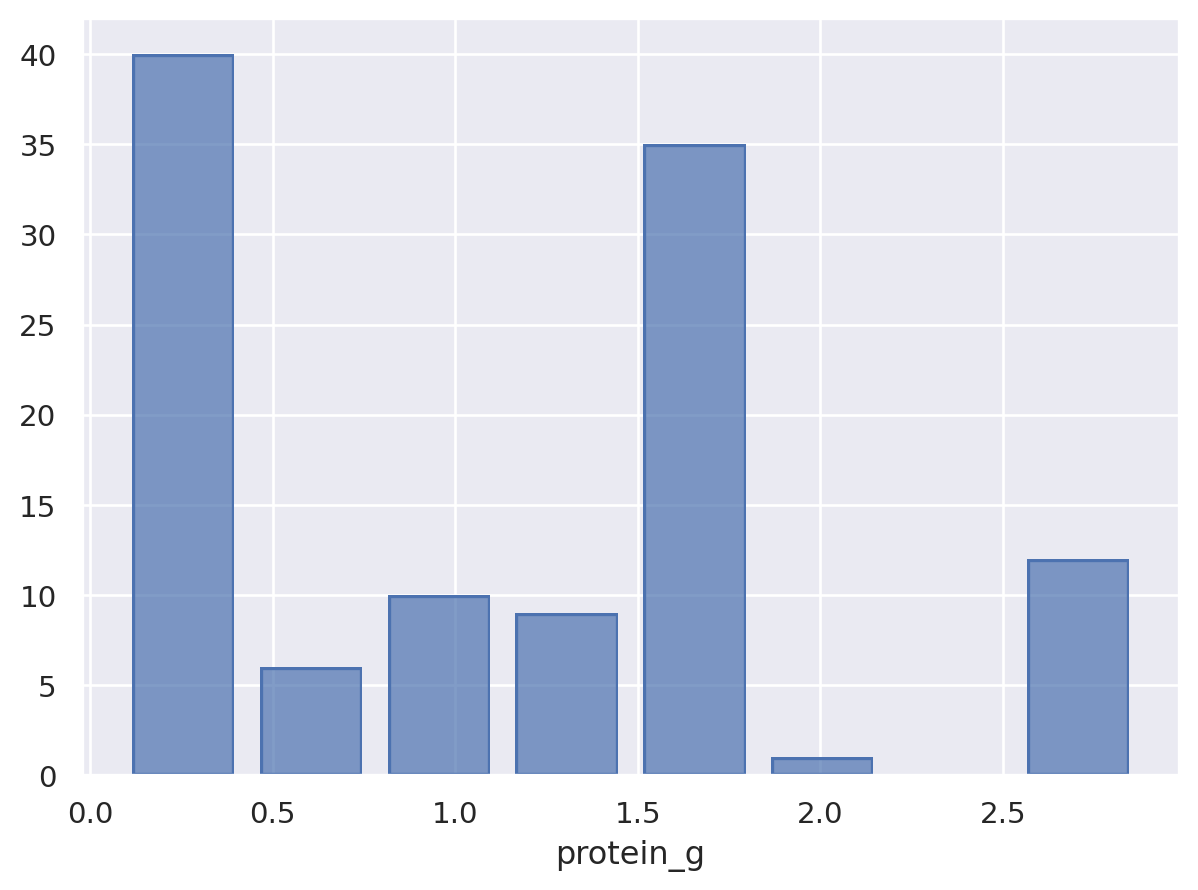

In [ ]:
import seaborn.objects as so
so.Plot(dfa_coffee, "protein_g").add(so.Bar(), so.Hist())


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/New Folder/FoodData_Central_survey_food_csv_2022-10-28/food.csv' , encoding='utf-8')


In [ ]:
df1.head()


,fdc_id,data_type,description,food_category_id,publication_date
0,2340760,survey_fndds_food,"Milk, human",NaN,2022-10-28
1,2340761,survey_fndds_food,"Milk, NFS",NaN,2022-10-28
2,2340762,survey_fndds_food,"Milk, whole",NaN,2022-10-28
3,2340763,survey_fndds_food,"Milk, reduced fat (2%)",NaN,2022-10-28
4,2340764,survey_fndds_food,"Milk, low fat (1%)",NaN,2022-10-28


In [ ]:
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…